In [116]:
import pandas as pd 
import numpy as np
import re
import json 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [3]:
with open('tweets_no_freq_words.txt', 'r') as filehandle: 
    tweets=json.load(filehandle)

In [4]:
tweets

['wootenomics and i were thinking about roses today checkout his newsletter and subscribe',
 'personal finance advice happy day after valentinesday where roses are as pretty but cheaper  relationship advice  listen to the above advice',
 'econwithdustin theecongames soundsthey are enjoying it',
 'dganstinei do  miles between cincinnati and lexingtona big difference cant imagine how much of a difference it would be to move closer to the lakes',
 'dganstine this sounds amazing i love winter weather',
 'mohammedalrahbi shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk itcreates a high barrier to entry because you have to prove that you will not fail what i called paternal government policies in my last discussion',
 'mohammedalrahbi shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk the bureaucracy is a function of culture not the otheraround the conversation around taking risk is controlled by parents fear of their kids failing  thes

##### TRY TO FIND "MALE" AND "FEMALE" TWEETS 
<P> BY "MALE" AND "FEMALE" TWEETS, I MEAN TWEETS WERE IT SEEMS A MAN IS BEING REFERRED TO IN THE THE TWEET OR A WOMAN</P>
        

In [155]:
her_list = []
her=[' her ', ' she ', 'women', 'woman', 'female', ' hers ', 'girl', 'wife', 'daughter', 'aunt', ' lady ', "ladies"]
for x in her:
    for tweet in tweets: 
        if x in tweet and tweet not in her_list:
            her_list.append(tweet)
            
            

In [156]:
len(her_list)

5275

In [157]:
for x in his:
    for tweet in her_list: 
        if x in tweet:
            her_list.pop(her_list.index(tweet))

In [158]:
len(her_list)

4609

In [11]:
her_list

['shathamaskiry nasralbusaidi jeni_houser dmpender jstorres drnickombe elonmusk i have heard jeni_houser in her workshops for entrepreneurs call it falling in love with the problem before finding solutions',
 'coffeewithdra is back this friday at am eastern i talk to profmoryl about her academic path and how she uses social media to build community join us for the premier and use the chat function to ask questions and share tips     teachecon econed',
 'coffeewithdra is back this friday at am eastern i talk to profmoryl about her academic path and her international experiences join us for the premier and use the chat function to ask questions and share tips   teachecon econed',
 'ill speak for half her price dms open',
 'andreamatranga a student once wrote in my evaluations she talks with her hands a what can i do',
 'wow what a journey but after so many years of adversity and struggling to convincethat her research was worthwhileher breakthrough in mrna technology could now change the

In [154]:
his_list = []
his=[' his ', ' he ', ' men ', ' man ', ' male ', ' hes ', 'boy', 'husband', ' son ', 'uncle', 'gentleman', 'gentlemen']
for x in his:
    for tweet in tweets: 
        if x in tweet and tweet not in his_list:
            his_list.append(tweet)

In [8]:
len(his_list)

10144

In [12]:
for x in her:
    for tweet in his_list: 
        if x in tweet:
            his_list.pop(his_list.index(tweet))

In [13]:
len(his_list)

9505

In [152]:
with open("his_list.txt", 'w') as filehandle: 
    json.dump(his_list, filehandle)

In [153]:
with open("her_list.txt", 'w') as filehandle: 
    json.dump(her_list, filehandle)

##### Create previous model

In [14]:
cv_tfidf = TfidfVectorizer(stop_words='english')

In [15]:
X_tfidf = cv_tfidf.fit_transform(tweets)

In [16]:
nmf_model = NMF(4)
topic_matrix = nmf_model.fit_transform(X_tfidf)



##### Apply to just "female" tweet

In [17]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [18]:
display_topics(nmf_model, cv_tfidf.get_feature_names(), 25)




Topic  0
covid, data, policy, work, vaccine, year, paper, day, years, deaths, pandemic, economic, public, new, economics, today, health, countries, uk, world, important, cases, point, big, market

Topic  1
good, point, luck, thread, morning, bad, thing, idea, pretty, andrew___baker, question, tweet, read, night, oh, start, job, hear, reason, things, look, news, causalinf, stuff, sounds

Topic  2
news, new, times, art, yorker, newspaper, financial, photography, york, year, best, scientist, happy, science, arts, innovation, story, economist, mashable, economy, artists, design, subscribe, read, congratulations

Topic  3
great, thanks, thread, paper, thank, work, read, interesting, congratulations, sharing, congrats, idea, opportunity, book, reading, research, nice, forward, job, looking, looks, discussion, students, wow, check


In [75]:
X_tfidf_2 = cv_tfidf.transform(her_list)

In [76]:
topic_matrix_2=nmf_model.transform(X_tfidf_2)

In [77]:
display_topics(nmf_model, cv_tfidf.get_feature_names(), 25)


Topic  0
covid, data, policy, work, vaccine, year, paper, day, years, deaths, pandemic, economic, public, new, economics, today, health, countries, uk, world, important, cases, point, big, market

Topic  1
good, point, luck, thread, morning, bad, thing, idea, pretty, andrew___baker, question, tweet, read, night, oh, start, job, hear, reason, things, look, news, causalinf, stuff, sounds

Topic  2
news, new, times, art, yorker, newspaper, financial, photography, york, year, best, scientist, happy, science, arts, innovation, story, economist, mashable, economy, artists, design, subscribe, read, congratulations

Topic  3
great, thanks, thread, paper, thank, work, read, interesting, congratulations, sharing, congrats, idea, opportunity, book, reading, research, nice, forward, job, looking, looks, discussion, students, wow, check


In [78]:
doc_topic = pd.DataFrame(topic_matrix_2.round(3),
             columns = ["component_1","component_2","component_3", "component_4"])
doc_topic



,component_1,component_2,component_3,component_4
0,0.004,0.001,0.0,0.001
1,0.012,0.000,0.0,0.002
2,0.009,0.000,0.0,0.002
3,0.007,0.000,0.0,0.000
4,0.004,0.001,0.0,0.001
...,...,...,...,...
4604,0.003,0.001,0.0,0.002
4605,0.004,0.000,0.0,0.001
4606,0.005,0.000,0.0,0.001
4607,0.007,0.000,0.0,0.000


In [23]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys


In [95]:
keys=get_keys(topic_matrix_2)
keys
Counter(keys)



Counter({0: 3774, 3: 362, 1: 193, 2: 280})

In [27]:
def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)


In [96]:
categories, counts = keys_to_counts(keys)


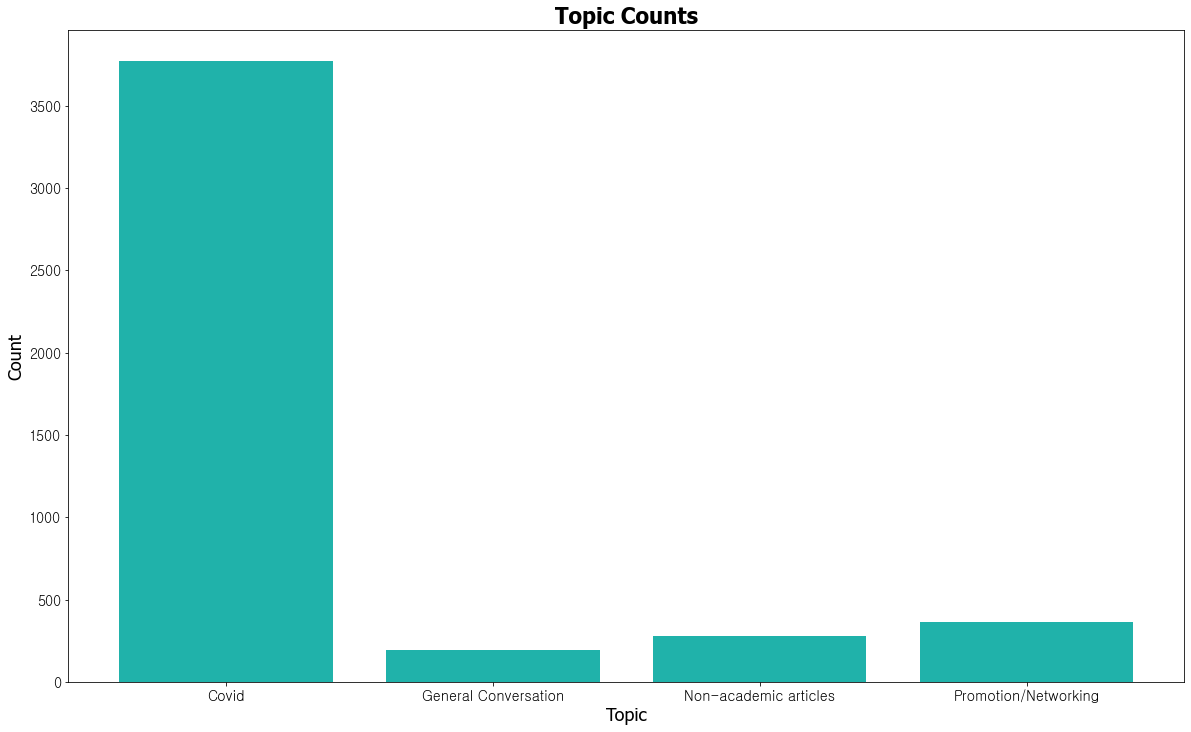

In [97]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.bar(categories,counts,color='lightseagreen');
ax.set_xticks(categories);
plt.xlabel("Topic", **tfont)
plt.ylabel("Count", **tfont)
ax.set_xticklabels(['Covid','Promotion/Networking','General Conversation','Non-academic articles'])
plt.title('Topic Counts', **tbfont)
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.savefig('topic_counts_her.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();


In [98]:
categories

[0, 3, 1, 2]

In [99]:
counts 

[3774, 362, 193, 280]

In [100]:
proportions=[round((item/sum(counts)),3) for item in counts]
proportions

[0.819, 0.079, 0.042, 0.061]

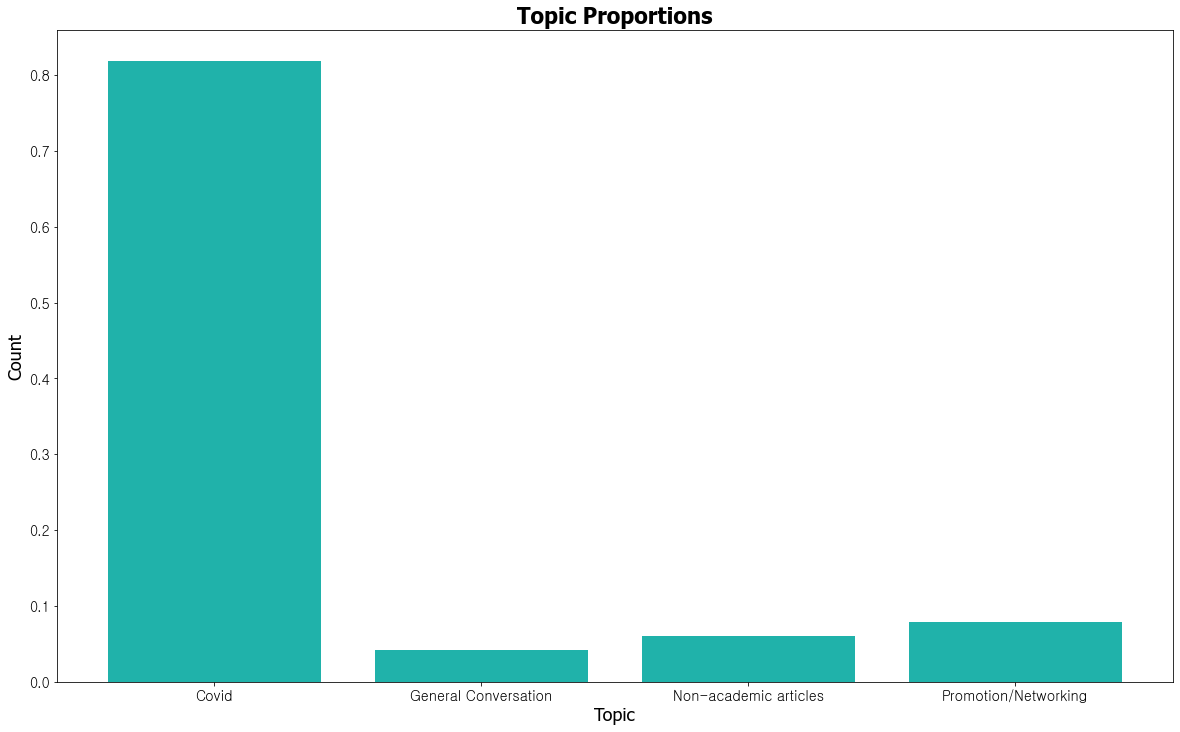

In [101]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12));
ax.bar(categories,proportions,color='lightseagreen');
ax.set_xticks(categories);
plt.xlabel("Topic", **tfont);
plt.ylabel("Count", **tfont);
ax.set_xticklabels(['Covid','Promotion/Networking','General Conversation','Non-academic articles']);
plt.title('Topic Proportions', **tbfont);
plt.xticks(**gfont);
plt.yticks(**gfont);
plt.savefig('topic_proportions_her.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();


##### Parse by "male" tweets

In [88]:
X_tfidf_3 = cv_tfidf.transform(his_list)

In [89]:
topic_matrix_3=nmf_model.transform(X_tfidf_3)

In [102]:
keys_3=get_keys(topic_matrix_3)
keys_3
Counter(keys_3)


Counter({0: 8002, 3: 578, 1: 475, 2: 450})

In [105]:
categories_3, counts_3 = keys_to_counts(keys_3)
categories

[0, 3, 1, 2]

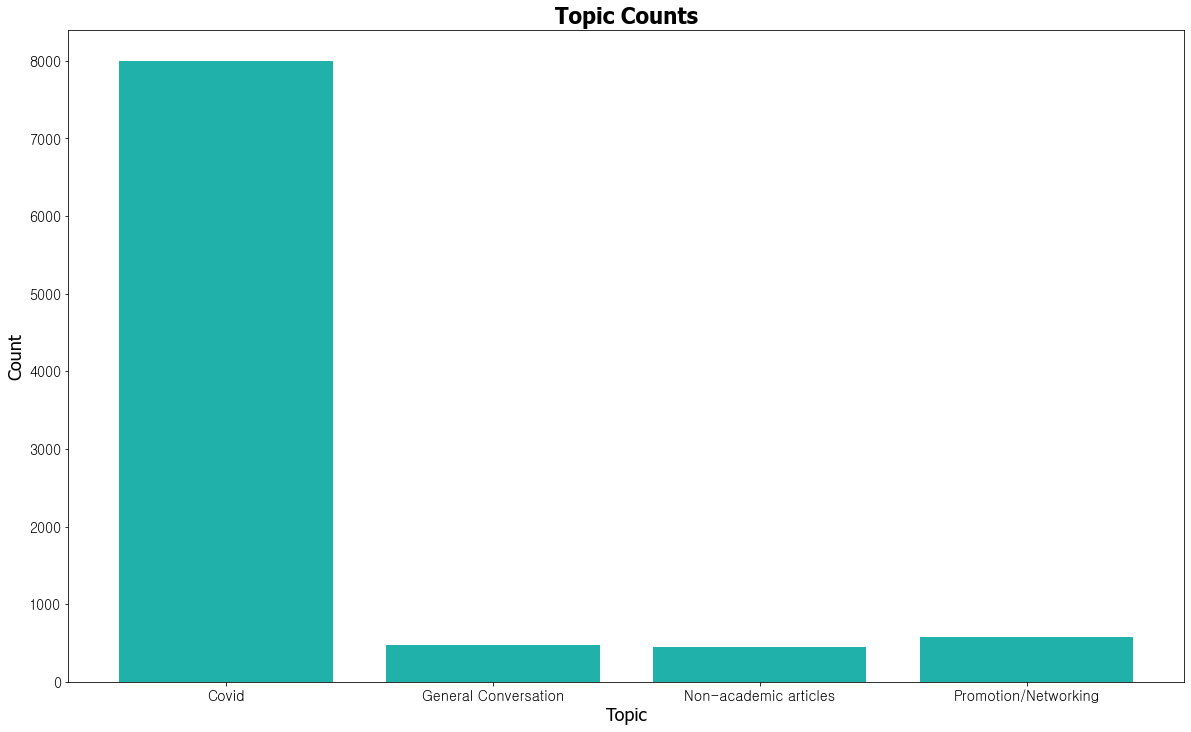

In [106]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.bar(categories_3,counts_3,color='lightseagreen');
ax.set_xticks(categories_3);
plt.xlabel("Topic", **tfont)
plt.ylabel("Count", **tfont)
ax.set_xticklabels(['Covid','Promotion/Networking','General Conversation','Non-academic articles'])
plt.title('Topic Counts', **tbfont)
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.savefig('topic_counts_his.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();


In [107]:
proportions_3=[round((item/sum(counts_3)),3) for item in counts_3]
proportions_3

[0.842, 0.061, 0.05, 0.047]

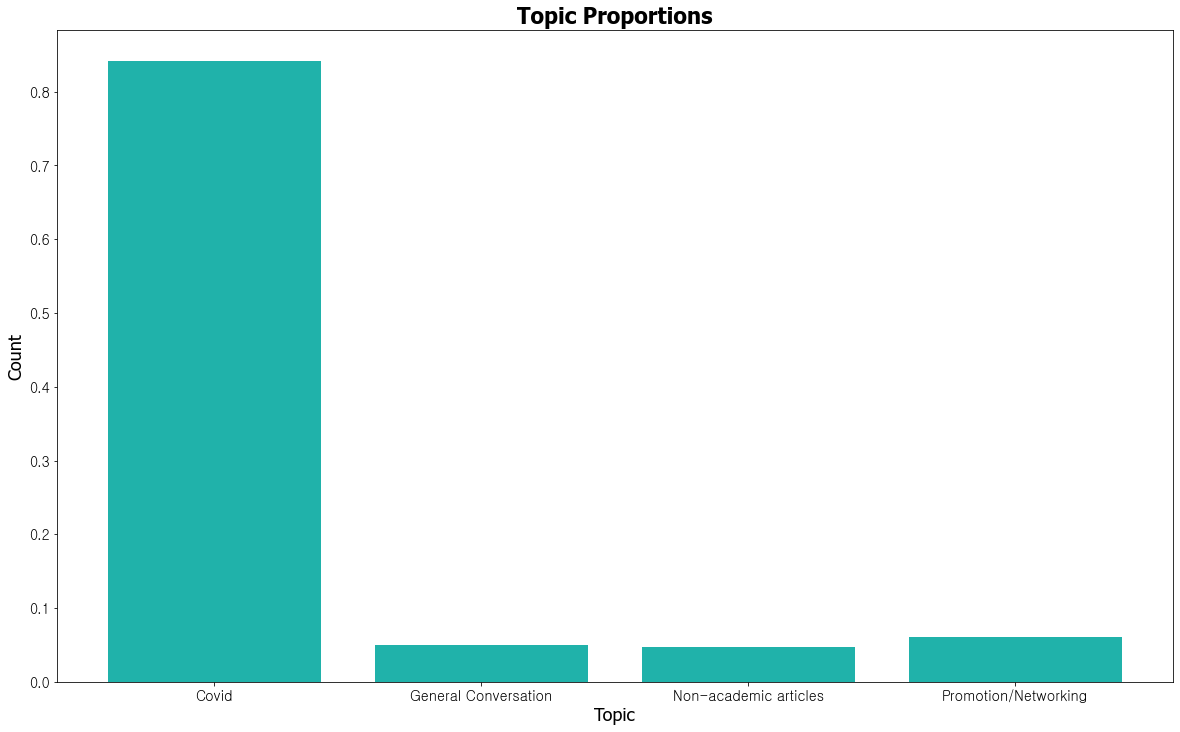

In [108]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12));
ax.bar(categories_3,proportions_3,color='lightseagreen');
ax.set_xticks(categories_3);
plt.xlabel("Topic", **tfont);
plt.ylabel("Count", **tfont);
ax.set_xticklabels(['Covid','Promotion/Networking','General Conversation','Non-academic articles']);
plt.title('Topic Proportions', **tbfont);
plt.xticks(**gfont);
plt.yticks(**gfont);
plt.savefig('topic_proportions_his.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();


#### Combine proportions plots

In [109]:
print(proportions)
print(proportions_3)



[0.819, 0.079, 0.042, 0.061]
[0.842, 0.061, 0.05, 0.047]


In [112]:
print(categories)
print(categories_3)

[0, 3, 1, 2]
[0, 3, 1, 2]


In [120]:
barWidth = 0.25
r1 = categories
r2 = [x + barWidth for x in r1]


[0.25, 3.25, 1.25, 2.25]

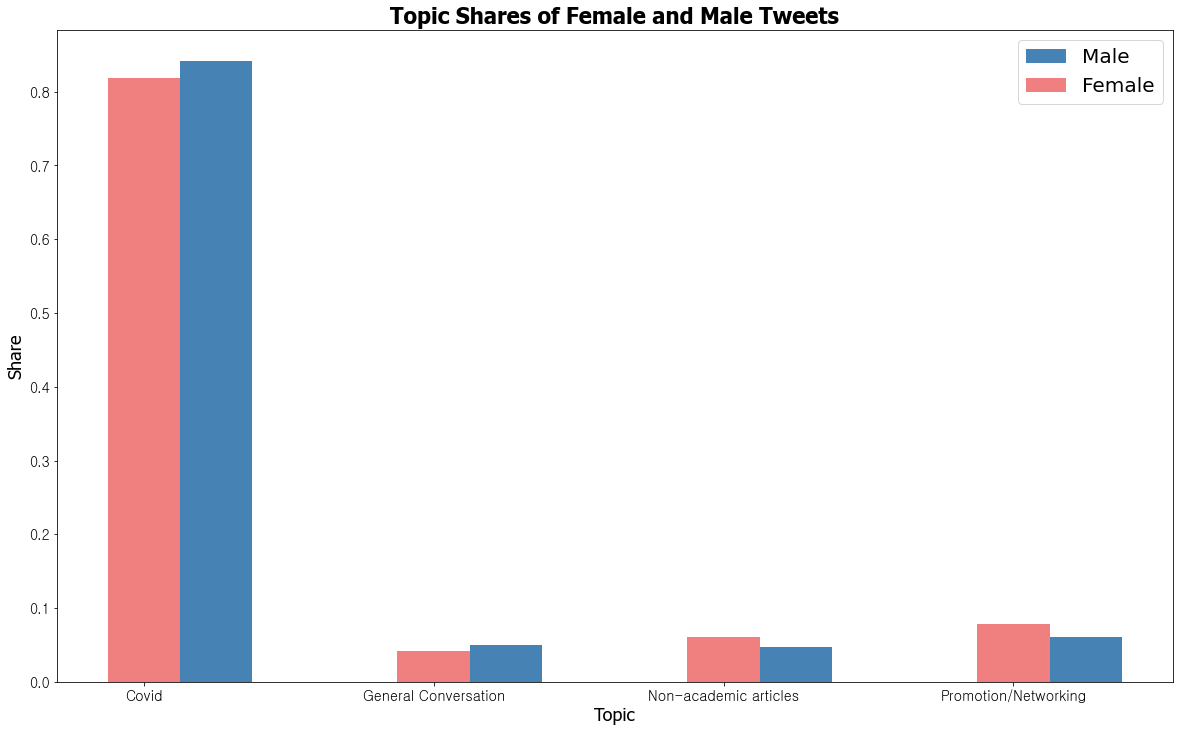

In [150]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12));
ax.bar(r2,proportions_3,width=.25, color='steelblue',label="Male");
ax.bar(r1,proportions,width=.25, color='lightcoral',label="Female");
ax.set_xticks(categories_3);
plt.xlabel("Topic", **tfont);
plt.ylabel("Share", **tfont);
ax.set_xticklabels(['Covid','Promotion/Networking','General Conversation','Non-academic articles']);
plt.title('Topic Shares of Female and Male Tweets', **tbfont);
plt.xticks(**gfont);
plt.yticks(**gfont);
plt.legend(prop={'size': 20})
plt.savefig('topic_proportions_his_her.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();
